# DS203: Assignment 5 (200260058)

#### Importing Required Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import math

## QUESTION 1

### a) Preliminaries
##### i)   Reading data file into a data frame:

In [2]:
df = pd.read_csv("DS203-A5.csv")
df_m = df[df['sex'] == "male"]
df_f = df[df['sex'] == "female"]

##### ii) Printing the dataset:

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


##### iii) Number of records:

In [4]:
len(df)

27820

##### iv) Number of variables:

In [5]:
len(df.columns)

12

 ##### v) Datatype of each variable:

In [6]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

##### vi) Number of Unique values for each variable:

In [7]:
for column in list(df.columns):
    print(f"{column} : {len(pd.unique(df[column]))}")

country : 101
year : 32
sex : 2
age : 6
suicides_no : 2084
population : 25564
suicides/100k pop : 5298
country-year : 2321
HDI for year : 306
 gdp_for_year ($)  : 2321
gdp_per_capita ($) : 2233
generation : 6


##### vii) Variable types: 

In [8]:
print("Categorical Data: \n 1) Country \n 2) Sex \n 3) Age \n 4) country-year \n 5) Generation \n")
print("Temporal Data : \n 1) Year \n")
print("Integer Data: \n 1) Suicides number \n 2) Population \n")
print("Continous Data: \n 1) Suicides / 100k population \n 2) HDI for year \n 3) GDP for year \n 4) GDP per capita")

Categorical Data: 
 1) Country 
 2) Sex 
 3) Age 
 4) country-year 
 5) Generation 

Temporal Data : 
 1) Year 

Integer Data: 
 1) Suicides number 
 2) Population 

Continous Data: 
 1) Suicides / 100k population 
 2) HDI for year 
 3) GDP for year 
 4) GDP per capita


##### viii) Number of missing entries:

In [9]:
for column in list(df.columns):
    null_check = df[column].isnull()
    null_entries = df[null_check == True]
    print(f"Number of missing entries for {column} : {len(null_entries)}")

Number of missing entries for country : 0
Number of missing entries for year : 0
Number of missing entries for sex : 0
Number of missing entries for age : 0
Number of missing entries for suicides_no : 0
Number of missing entries for population : 0
Number of missing entries for suicides/100k pop : 0
Number of missing entries for country-year : 0
Number of missing entries for HDI for year : 19456
Number of missing entries for  gdp_for_year ($)  : 0
Number of missing entries for gdp_per_capita ($) : 0
Number of missing entries for generation : 0


##### ix) Number of records with no missing entries:

In [10]:
len(df.dropna())

8364

### b) Discrete variables:

##### i) Frequency of each value:

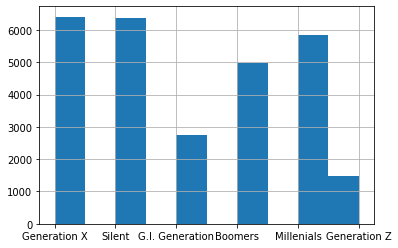

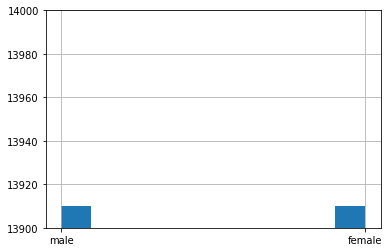

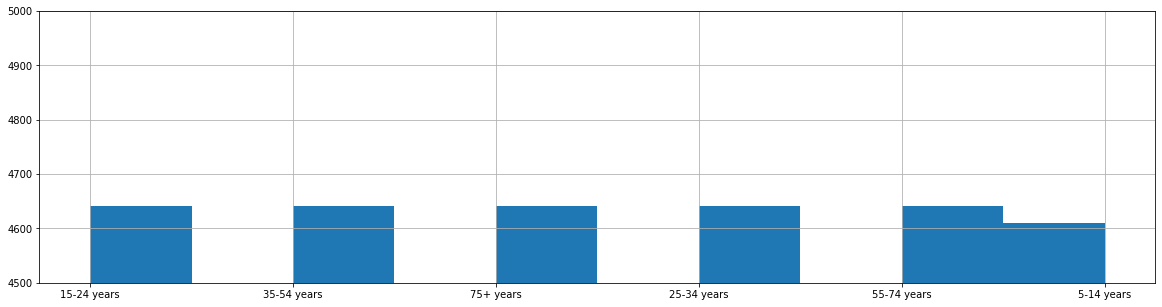

In [11]:

df['generation'].hist()
plt.show()

df["sex"].hist()
plt.ylim([13900,14000])
plt.show()

fig = plt.figure(figsize = (20,5))
df['age'].hist()
plt.ylim([4500,5000])
plt.show()

##### ii) Mode value for each variable

In [12]:
print(f"Generation Mode: {df['generation'].mode().iloc[0]}")
print(f"Sex Mode: {df['sex'].mode().iloc[0]},{df['sex'].mode().iloc[1]}")
print(f"Age Mode: {df['age'].mode().iloc[0]},{df['age'].mode().iloc[1]},{df['age'].mode().iloc[2]},{df['age'].mode().iloc[3]},{df['age'].mode().iloc[4]}")

Generation Mode: Generation X
Sex Mode: female,male
Age Mode: 15-24 years,25-34 years,35-54 years,55-74 years,75+ years


##### iii) Entropy for each variable

In [78]:
for column in list(df.columns):
    counts = df[column].value_counts()
    print(f"{column} Entropy: {scipy.stats.entropy(counts,base=2)}")

country Entropy: 6.509606001511676
year Entropy: 4.952708775332643
sex Entropy: 1.0
age Entropy: 2.584957721382318
suicides_no Entropy: 7.565122397033753
population Entropy: 14.565817577285744
suicides/100k pop Entropy: 10.432139130056022
country-year Entropy: 11.180385077462345
HDI for year Entropy: 8.013105159926797
 gdp_for_year ($)  Entropy: 11.180385077462345
gdp_per_capita ($) Entropy: 11.103644844558575
generation Entropy: 2.4460161350809893


### c) Continous variables:

##### i) Statistics for each variable:

In [13]:
df['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

In [14]:
df['population'].describe()

count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: population, dtype: float64

In [15]:
df['suicides/100k pop'].describe()

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicides/100k pop, dtype: float64

In [16]:
df['HDI for year'].describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

In [17]:
for i in range(len(df)):
    df[' gdp_for_year ($) '].iloc[i] = df[' gdp_for_year ($) '].iloc[i].replace(",","")
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(float)
df[' gdp_for_year ($) '].describe()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    2.782000e+04
mean     4.455810e+11
std      1.453610e+12
min      4.691962e+07
25%      8.985353e+09
50%      4.811469e+10
75%      2.602024e+11
max      1.812071e+13
Name:  gdp_for_year ($) , dtype: float64

In [18]:
df['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

##### ii) Box and Whisker plots

<AxesSubplot:xlabel='suicides_no'>

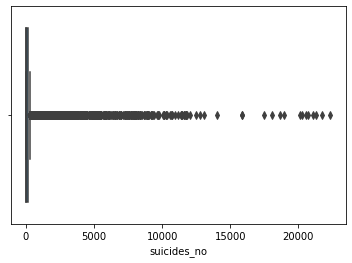

In [19]:
sns.boxplot(x = df['suicides_no'])

<AxesSubplot:xlabel='population'>

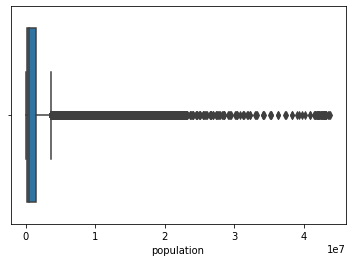

In [20]:
sns.boxplot(x = df['population'])

<AxesSubplot:xlabel='suicides/100k pop'>

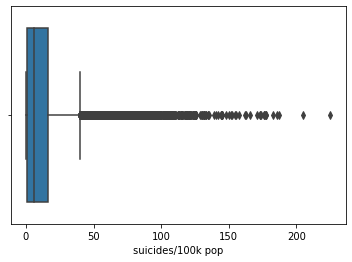

In [21]:
sns.boxplot(x = df['suicides/100k pop'])

<AxesSubplot:xlabel='HDI for year'>

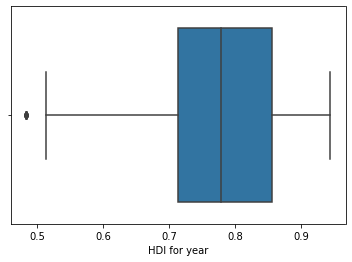

In [22]:
sns.boxplot(x = df['HDI for year'])

<AxesSubplot:xlabel=' gdp_for_year ($) '>

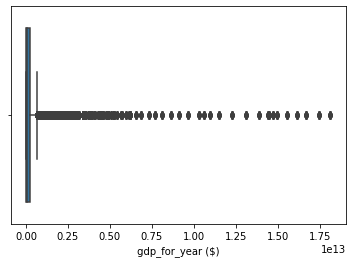

In [23]:
sns.boxplot(x = df[' gdp_for_year ($) '])

<AxesSubplot:xlabel='gdp_per_capita ($)'>

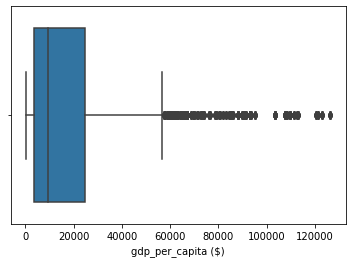

In [24]:
sns.boxplot(x = df['gdp_per_capita ($)'])

##### iii) Histograms

SUICIDES:

Too many bins:

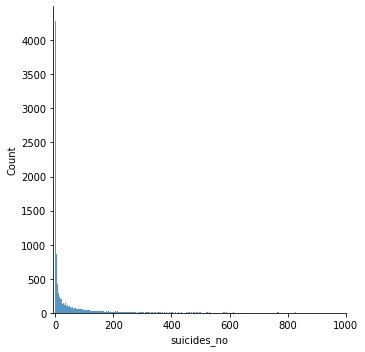

In [25]:
sns.displot(data = df,x = "suicides_no",binwidth=1)
plt.xlim([-6.7,1000])
plt.show()

Too few bins:

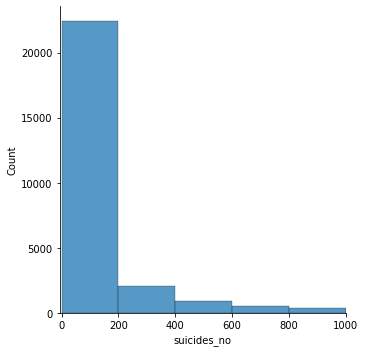

In [26]:
sns.displot(data = df,x = "suicides_no",binwidth=200)
plt.xlim([-6.7,1000])
plt.show()

Good number of bins:

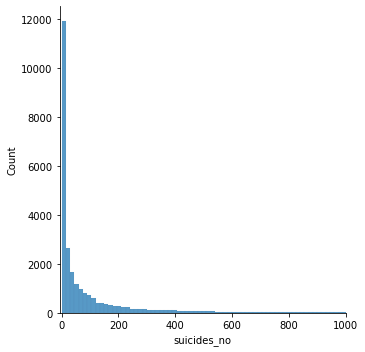

In [27]:
sns.displot(data = df,x = "suicides_no",binwidth=15)
plt.xlim([-6.7,1000])
plt.show()

POPULATION:

Too many bins:

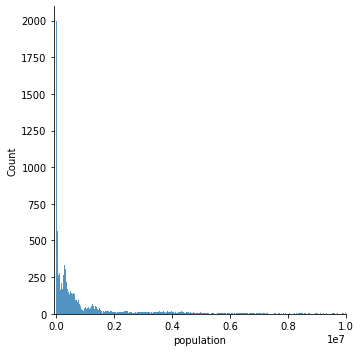

In [28]:
sns.displot(data=df,x= 'population',binwidth = 10000)
plt.xlim([-100000,1e7])
plt.show()

Too few bins:

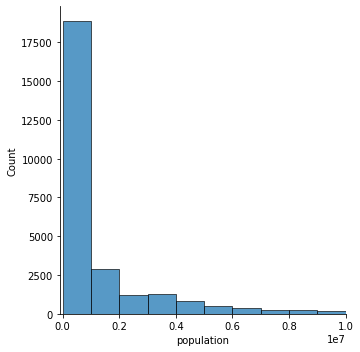

In [29]:
sns.displot(data=df,x= 'population',binwidth = 1000000)
plt.xlim([-100000,1e7])
plt.show()

Good number of bins:

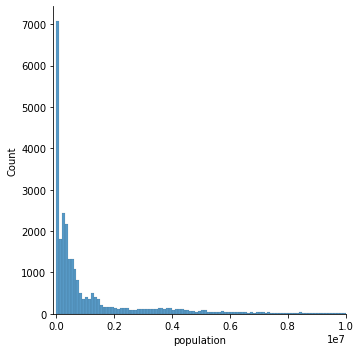

In [30]:
sns.displot(data=df,x= 'population',binwidth = 100000)
plt.xlim([-100000,1e7])
plt.show()

SUICIDES / 100k POP

Too many bins:

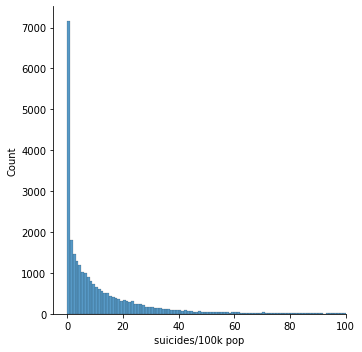

In [31]:
sns.displot(data=df,x = "suicides/100k pop",binwidth=1)
plt.xlim([-5,100])
plt.show()

Too few bins:

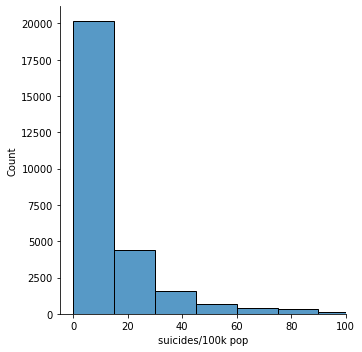

In [32]:
sns.displot(data=df,x = "suicides/100k pop",binwidth=15)
plt.xlim([-5,100])
plt.show()

Good number of bins:

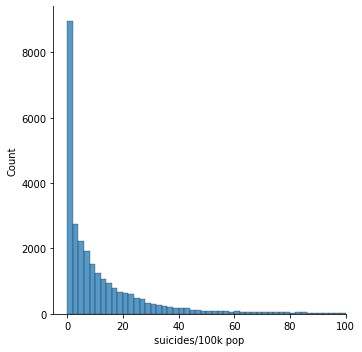

In [33]:
sns.displot(data=df,x = "suicides/100k pop",binwidth=2)
plt.xlim([-5,100])
plt.show()

HDI FOR YEAR

Too many bins:

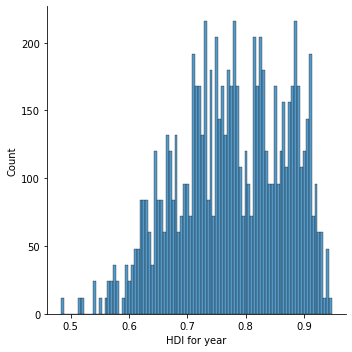

In [34]:
sns.displot(data=df,x = "HDI for year",binwidth=0.005)
plt.show()

Too few bins:

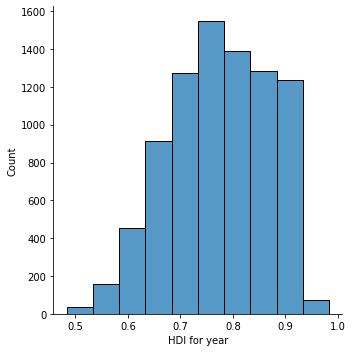

In [35]:
sns.displot(data=df,x = "HDI for year",binwidth=0.05)
plt.show()

Good number of bins:

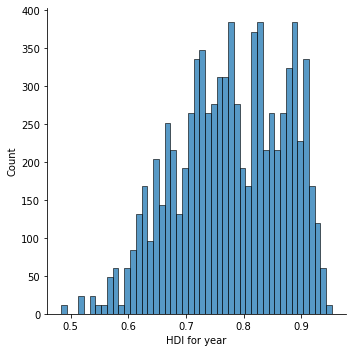

In [36]:
sns.displot(data=df,x = "HDI for year",binwidth=0.01)
plt.show()

GDP FOR YEAR

Too many bins:

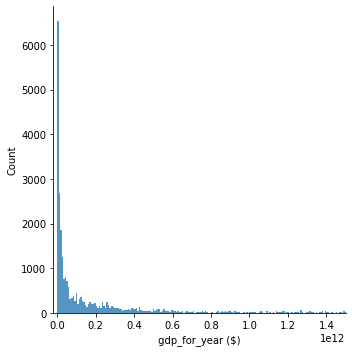

In [37]:
sns.displot(data=df,x = ' gdp_for_year ($) ',binwidth=8e9)
plt.xlim([-2e10,0.15e13])
plt.show()

Too few bins

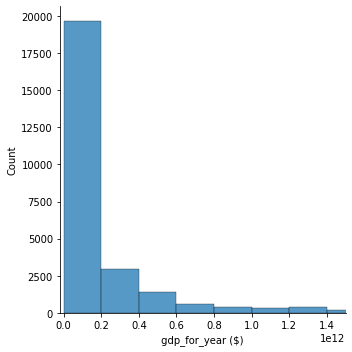

In [38]:
sns.displot(data=df,x = ' gdp_for_year ($) ',binwidth=2e11)
plt.xlim([-2e10,0.15e13])
plt.show()

Good number of bins:

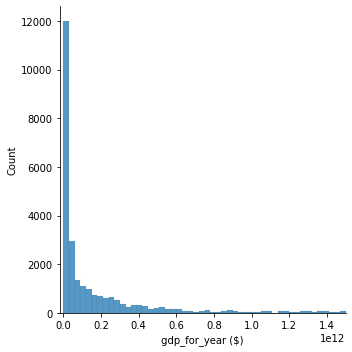

In [39]:
sns.displot(data=df,x = ' gdp_for_year ($) ',binwidth=3e10)
plt.xlim([-2e10,0.15e13])
plt.show()

GDP PER CAPITA

Too many bins

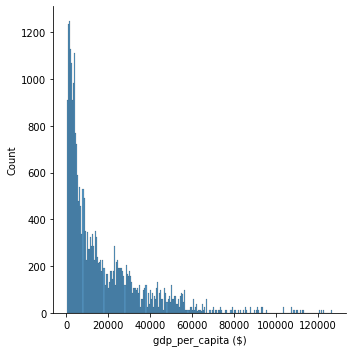

In [40]:
sns.displot(data=df,x = 'gdp_per_capita ($)',binwidth=500)
plt.show()

Too few bins

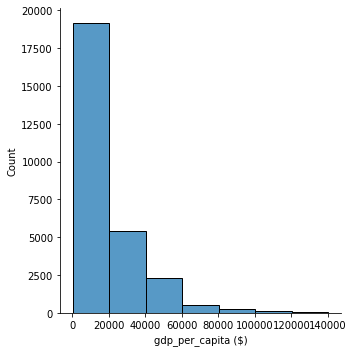

In [41]:
sns.displot(data=df,x = 'gdp_per_capita ($)',binwidth=20000)
plt.show()

Good number of bins

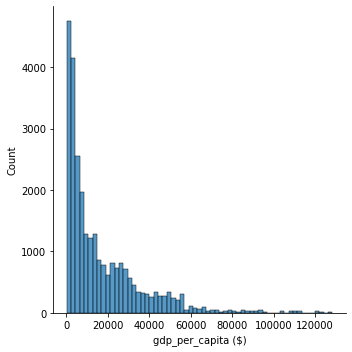

In [42]:
sns.displot(data=df,x = 'gdp_per_capita ($)',binwidth=2100)
plt.show()

##### iv) QQ-Plot

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([    0,     0,     0, ..., 21262, 21706, 22338])),
 (454.37188979216415, 242.5744069015099, 0.5036492703444655))

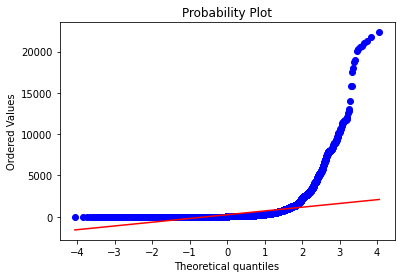

In [43]:
scipy.stats.probplot(df["suicides_no"], dist="norm", plot=plt)

#### Thus the Number of Suicides is NOT Normally distributed

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([     278,      278,      286, ..., 43509335, 43607902, 43805214])),
 (2740534.523509188, 1844793.6173975565, 0.7004986119219835))

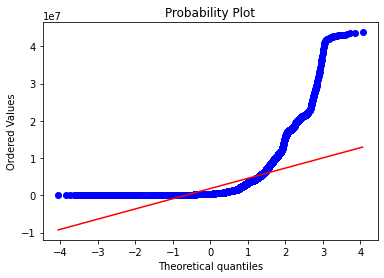

In [44]:
scipy.stats.probplot(df["population"], dist="norm", plot=plt)

#### Thus the Population is NOT Normally distributed

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([  0.  ,   0.  ,   0.  , ..., 187.06, 204.92, 224.97])),
 (15.536908476094593, 12.816097411933866, 0.8192907023646434))

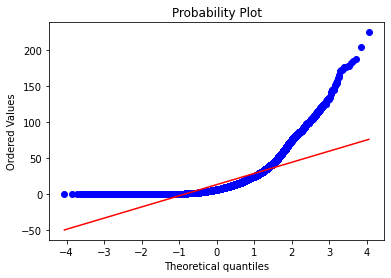

In [45]:
scipy.stats.probplot(df["suicides/100k pop"], dist="norm", plot=plt)

#### Thus the Number of suicides / 100k population is NOT Normally distributed

((array([-3.76621887, -3.53856914, -3.41347029, ...,  3.41347029,
          3.53856914,  3.76621887]),
  array([0.483, 0.483, 0.483, ..., 0.944, 0.944, 0.944])),
 (0.09229766323261193, 0.7766011477761836, 0.9881936515078366))

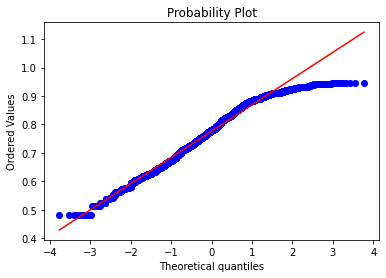

In [46]:
new_df = df.dropna()
scipy.stats.probplot(new_df["HDI for year"], dist="norm", plot=plt)

We see that the HDI for Year seems to be normally distributed for some values and not normally distributed for other values

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([4.6919625e+07, 4.6919625e+07, 4.6919625e+07, ..., 1.8120714e+13,
         1.8120714e+13, 1.8120714e+13])),
 (801942080632.1248, 445580969025.7269, 0.5516218580008317))

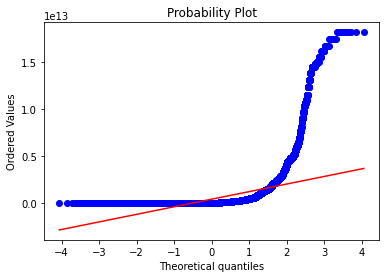

In [47]:
scipy.stats.probplot(df[" gdp_for_year ($) "], dist="norm", plot=plt)

#### Thus the GDP for year is NOT Normally distributed

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([   251,    251,    251, ..., 126352, 126352, 126352])),
 (16744.693285344372, 16866.46441409059, 0.8864358722854724))

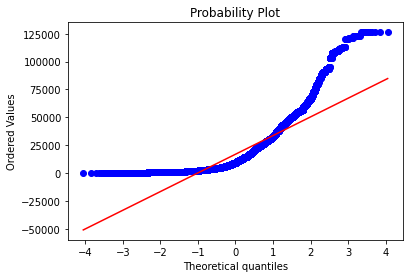

In [48]:
scipy.stats.probplot(df["gdp_per_capita ($)"], dist="norm", plot=plt)

#### Thus the GDP per Capita is NOT Normally distributed

##### v) log-normal check

((array([-4.01720438, -3.80300403, -3.68587737, ...,  3.68587737,
          3.80300403,  4.01720438]),
  array([ 0.        ,  0.        ,  0.        , ...,  9.96467672,
          9.985344  , 10.01404454])),
 (2.065126623657082, 3.6868845645295556, 0.9921231753416649))

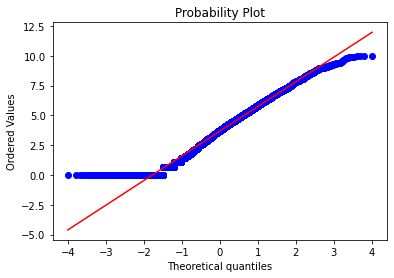

In [49]:
new_df = df[df["suicides_no"] != 0]
new_df = new_df['suicides_no']
new_df = np.log(new_df)
new_df = new_df.dropna()
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the Number of Suicides is Log-Normally distributed as it lies on the line for many values

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([ 5.62762111,  5.62762111,  5.65599181, ..., 17.58848607,
         17.59074893, 17.59526341])),
 (2.0981335716118146, 12.793229049724516, 0.9908155549727451))

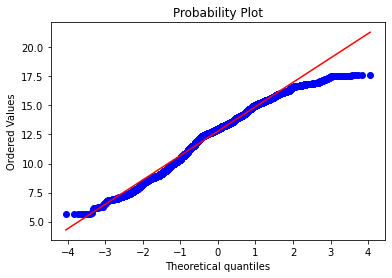

In [50]:
new_df = np.log(df["population"])
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the Population is Normally distributed as it lies on the line for many values

((array([-4.01720438, -3.80300403, -3.68587737, ...,  3.68587737,
          3.80300403,  4.01720438]),
  array([-3.91202301, -3.91202301, -3.91202301, ...,  5.23142942,
          5.32261966,  5.41596706])),
 (1.4558642058237143, 1.899675945273765, 0.9864207480666576))

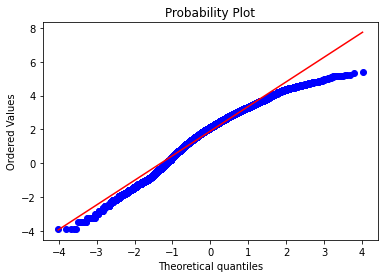

In [51]:
new_df = df[df["suicides/100k pop"] != 0]
new_df = new_df['suicides/100k pop']
new_df = np.log(new_df)
new_df = new_df.dropna()
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the Number of Suicides /100k population is Log-Normally distributed as it lies on the line for many values

((array([-3.76621887, -3.53856914, -3.41347029, ...,  3.41347029,
          3.53856914,  3.76621887]),
  array([-0.72773863, -0.72773863, -0.72773863, ..., -0.05762911,
         -0.05762911, -0.05762911])),
 (0.12209269350621095, -0.260368304516144, 0.9821332205473106))

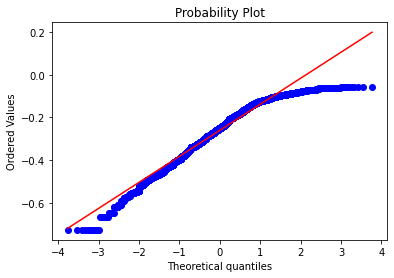

In [52]:
new_df = np.log(df["HDI for year"])
new_df = new_df.dropna()
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the HDI for year is Log-Normally distributed as it lies on the line for many values

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([17.66394659, 17.66394659, 17.66394659, ..., 30.52807682,
         30.52807682, 30.52807682])),
 (2.3894792304464603, 24.5325384597684, 0.9972654195011755))

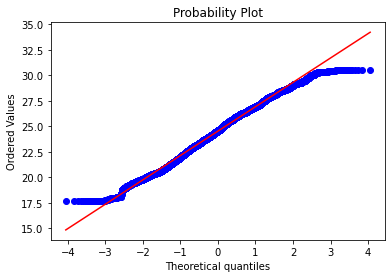

In [53]:
new_df = np.log(df[" gdp_for_year ($) "])
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the GDP for year is Log-Normally distributed as it lies on the line for many values

((array([-4.05642181, -3.84418333, -3.72821041, ...,  3.72821041,
          3.84418333,  4.05642181]),
  array([ 5.52545294,  5.52545294,  5.52545294, ..., 11.74682694,
         11.74682694, 11.74682694])),
 (1.2553390879337711, 9.066654137929426, 0.9899430125441037))

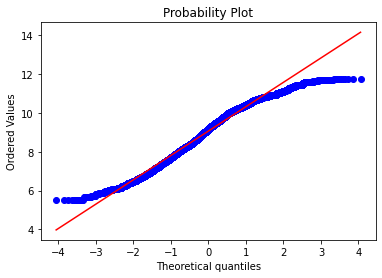

In [54]:
new_df = np.log(df["gdp_per_capita ($)"])
scipy.stats.probplot(new_df, dist="norm", plot=plt)

#### Thus the GDP per capita is Log-Normally distributed as it lies on the line for many values

### d) Pair-wise interaction

##### i) Box and whisker plots for continous vs discrete variables

TWO PAIRS : 
1) HDI for Year and Generation \
2) Suicides / 100k population and Age group

<AxesSubplot:xlabel='generation', ylabel='HDI for year'>

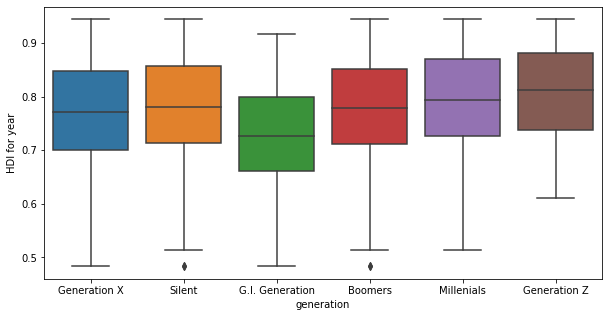

In [55]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = "generation",y = "HDI for year")

<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

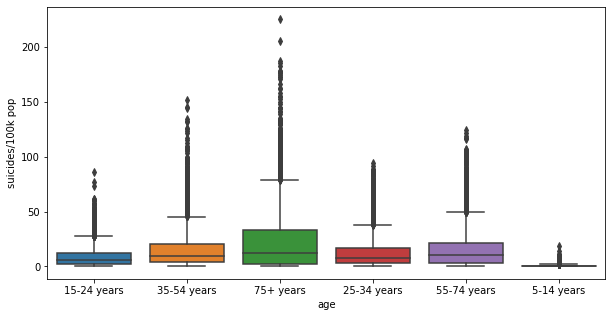

In [56]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = "age",y = "suicides/100k pop")

##### ii) Heatmap of correlation between continous variables

<AxesSubplot:>

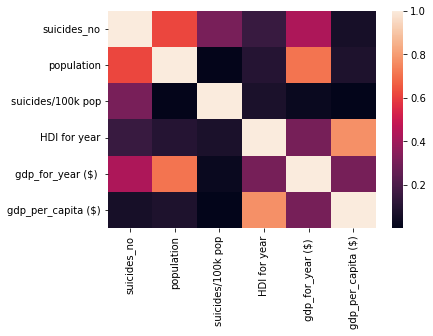

In [57]:
continous_variables = ["suicides_no","population","suicides/100k pop","HDI for year"," gdp_for_year ($) ","gdp_per_capita ($)"]

new_df = df[continous_variables]

sns.heatmap(new_df.corr())

i) We see that the number of suicides and the population is correlated as expected \
ii) GDP for year and Population is also correlated which is also expected because of its intensive nature. \
iii) Suicides / 100k Population and the population are not correlated which means that the rate of suicide is not dependent on the population number.

##### iii) Another EDA

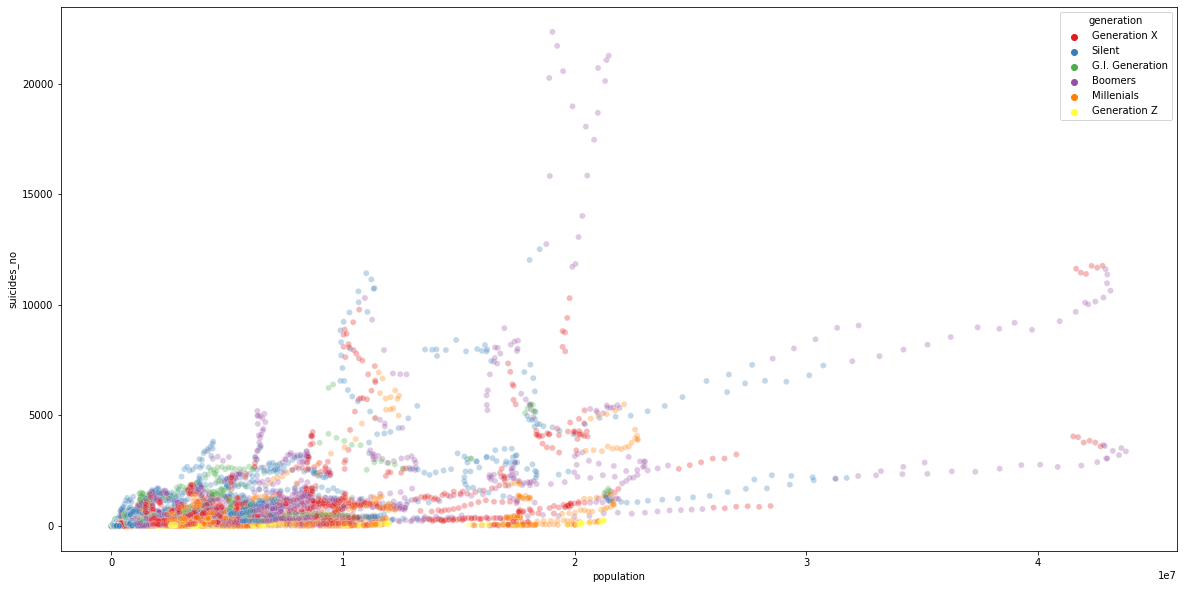

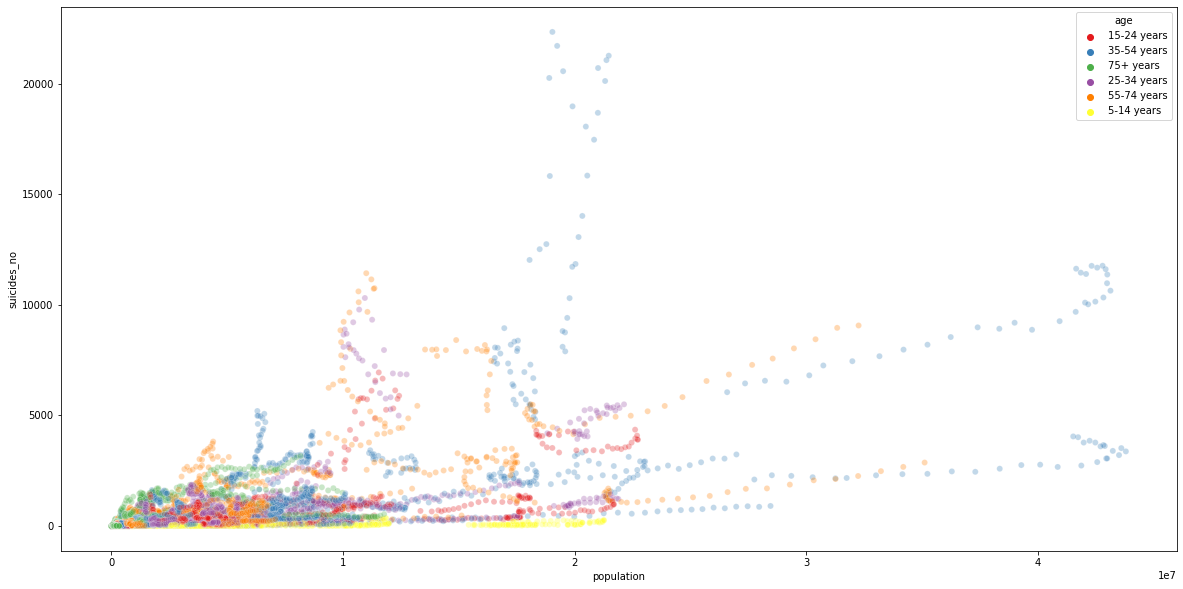

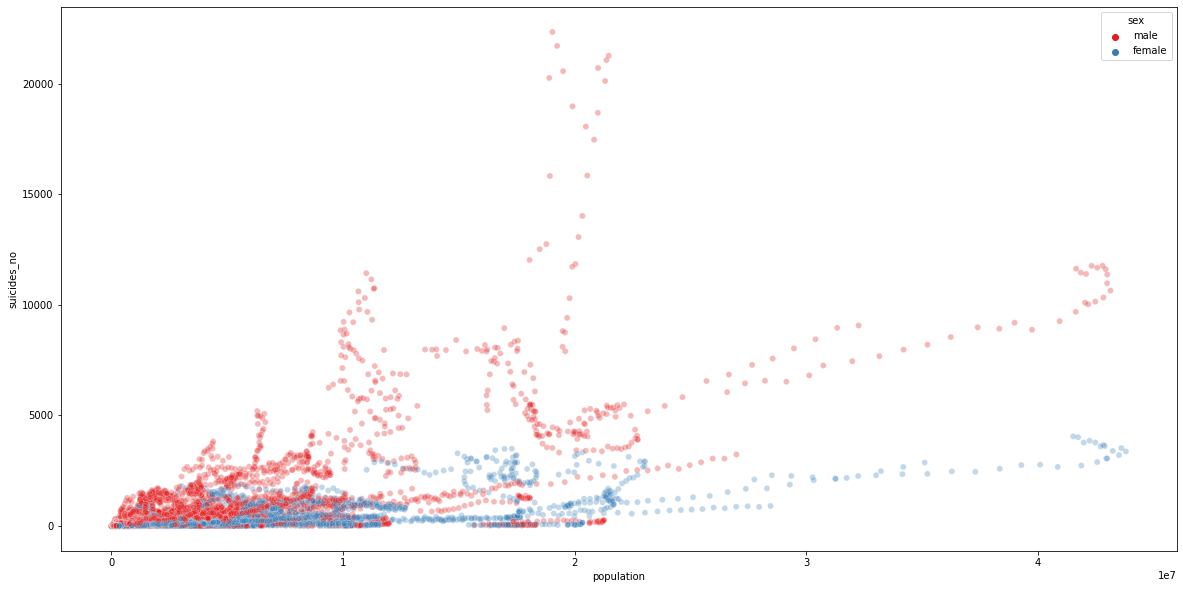

In [58]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x = "population",y = "suicides_no",hue = "generation",palette = "Set1",alpha=0.3)
plt.show()

fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x = "population",y = "suicides_no",hue = "age",palette = "Set1",alpha=0.3)
plt.show()

fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x = "population",y = "suicides_no",hue = "sex",palette = "Set1",alpha=0.3)
plt.show()


## Question 2

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  float64
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [60]:
current = df
country_list = pd.unique(df['country'])

#### a) Top 6 countries by average yearly suicides

In [81]:
count_dict = {}
for country in country_list:
    cur = current[current['country'] == country]
    n = len(pd.unique(cur['year']))
    average_suic = (cur.sum()['suicides_no']/cur.sum()['population'])*100000
    #print(country,":",average_suic)
    count_dict[country] = average_suic
ave = list(count_dict.values())
ave.sort(reverse=True)
ave = ave[:6]
top_6 = {}
for i in ave:
    for country in country_list:
        if count_dict[country] == i:
            top_6[country] = i
top_6

{'Lithuania': 41.182218575811106,
 'Russian Federation': 32.77720660120264,
 'Sri Lanka': 30.483938731978377,
 'Belarus': 30.34468485576486,
 'Hungary': 29.717557601652377,
 'Latvia': 28.47101084796792}

The above dictionary gives the top 6 countries in average yearly suicides / 100k population

In [82]:
lith = current[current['country'] == 'Lithuania']
rus = current[current['country'] == 'Russian Federation']
sri = current[current['country'] == 'Sri Lanka']
bel = current[current['country'] == 'Belarus']
hun = current[current['country'] == 'Hungary']
lat = current[current['country'] == 'Latvia']

frames = [lith,rus,sri,bel,hun,lat]
top_6_df = pd.concat(frames)


##### Plots for suicides / 100k population yearly

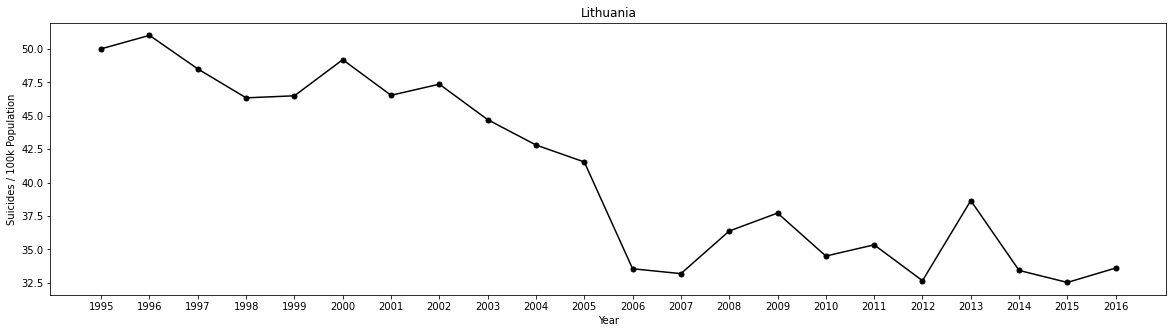

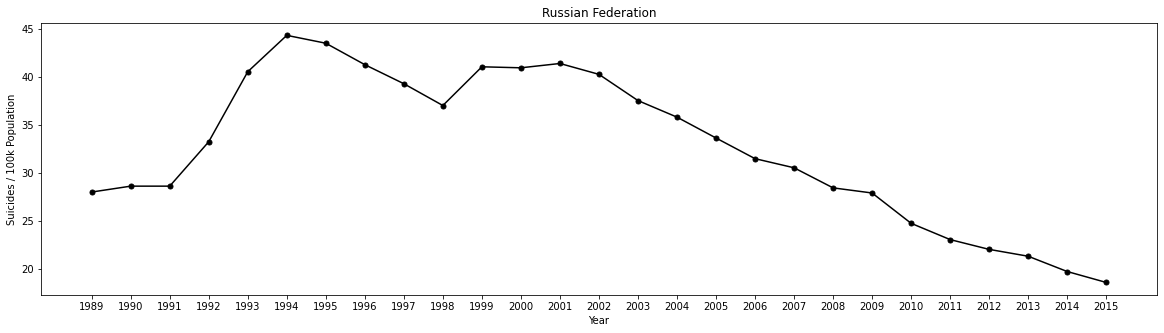

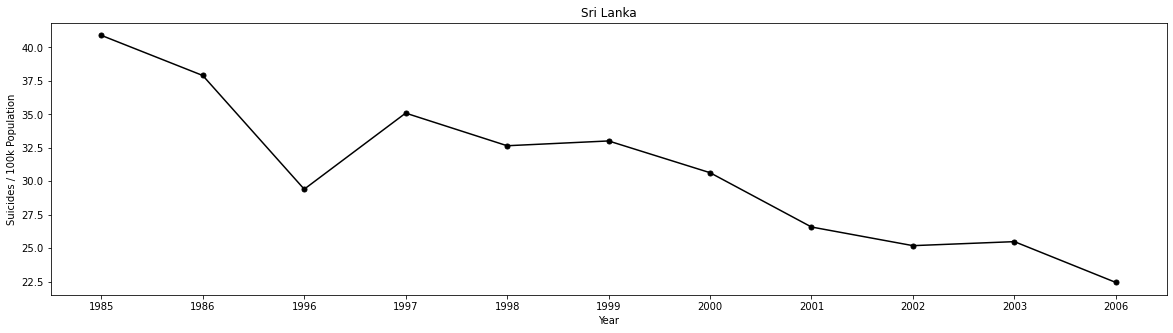

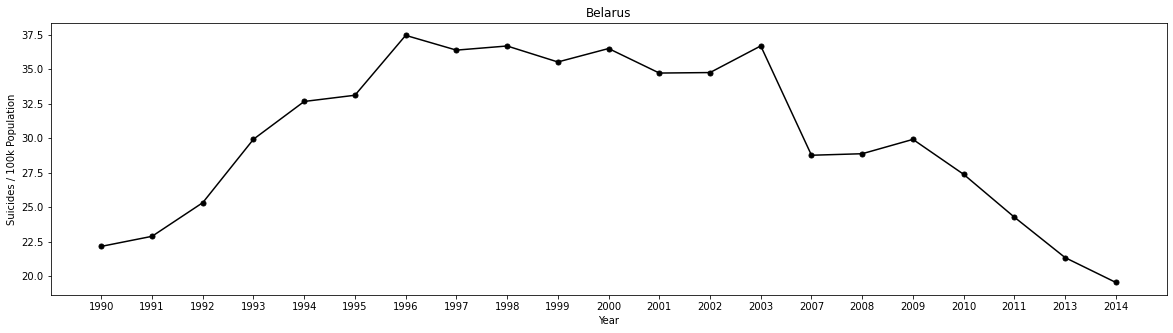

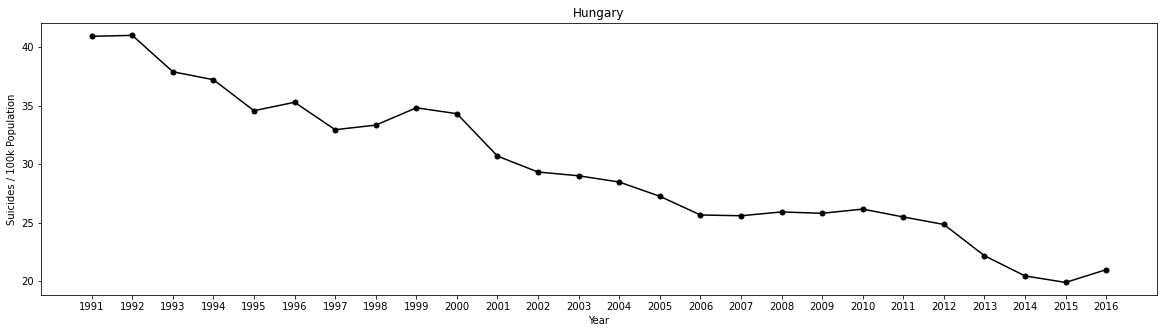

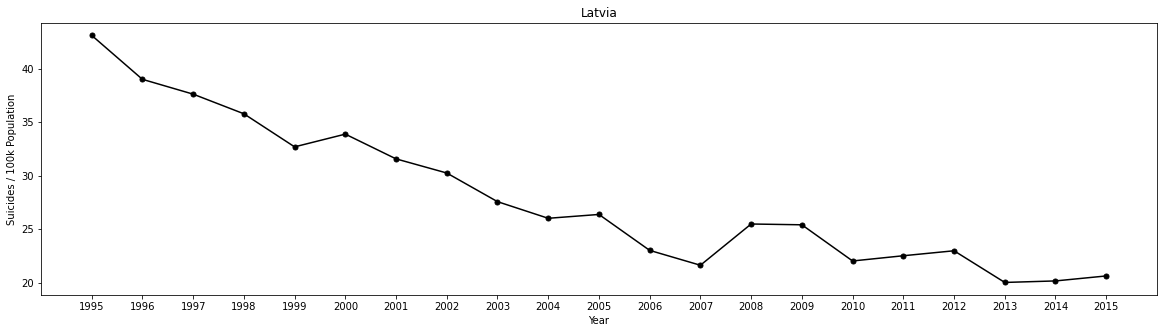

In [83]:
for element in list(top_6.keys()):
    element_df = current[current['country'] == element]
    year_dict = {}
    for year in pd.unique(element_df['year']):
        temp = element_df[element_df['year'] == year]
        value = (temp.sum()['suicides_no']/temp.sum()['population'])*100000
        year_dict[year] = value
    fig = plt.figure(figsize = (20,5))
    x = [str(e) for e in list(year_dict.keys())]
    plt.plot(x , list(year_dict.values()),marker='o',color='k',ms=5)
    plt.title(element)
    plt.xlabel("Year")
    plt.ylabel("Suicides / 100k Population")
    plt.show()

As we can see, in the top 6 countries the Number of suicides / 100,000 population is decreasing with time. This might suggest that modern suicide helplines are doing a more effective and efficient job.

#### b) Top 6 countries with mix of age group:

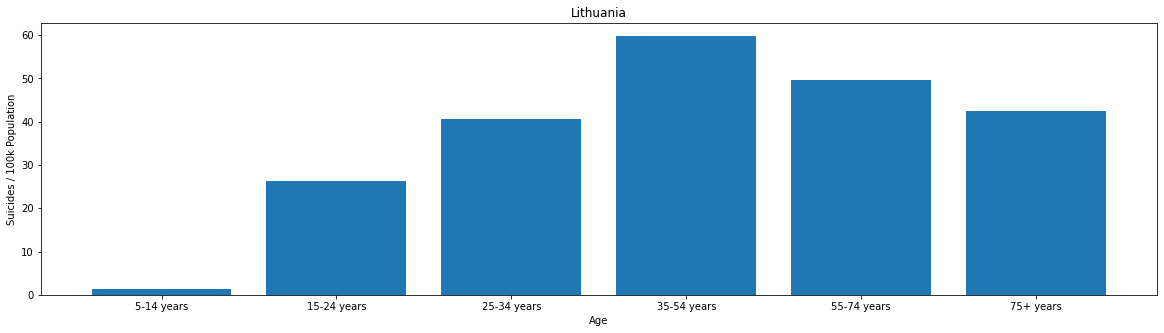

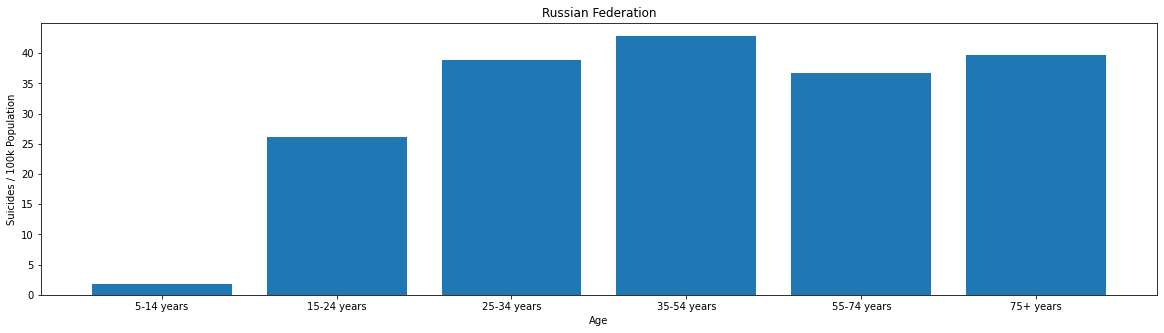

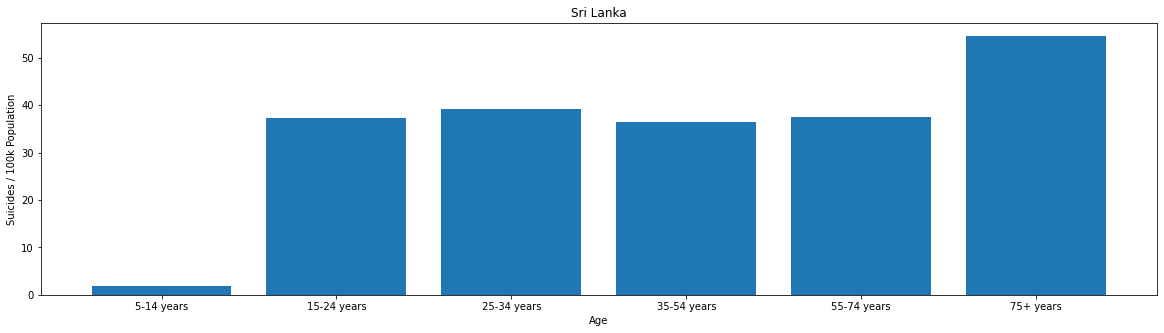

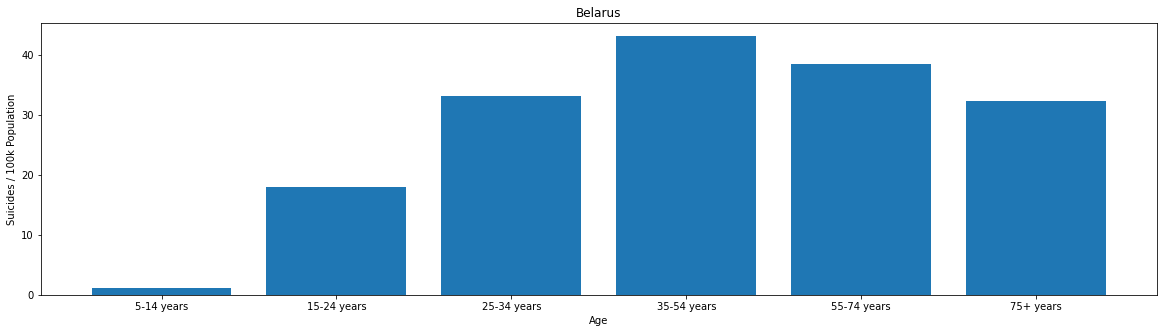

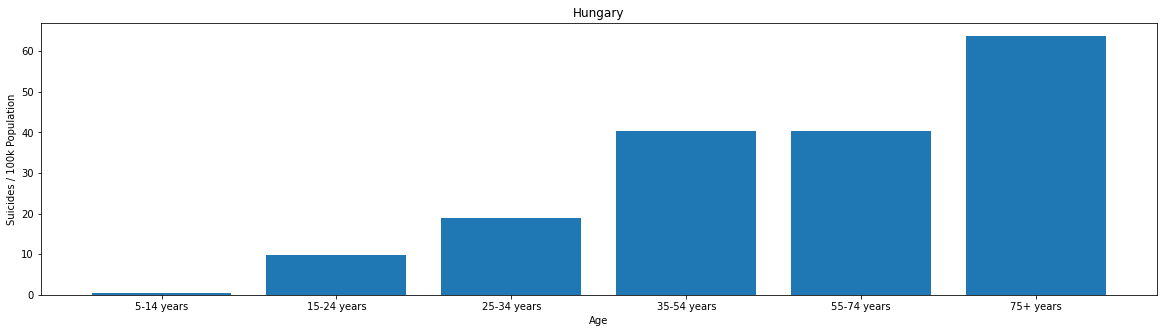

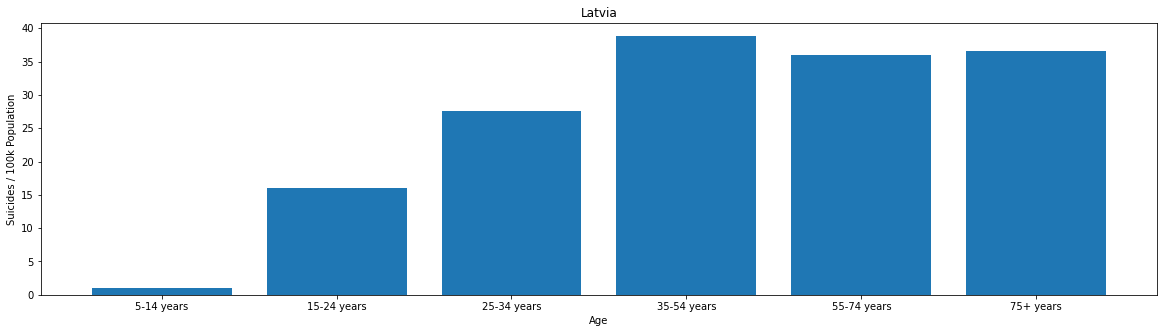

In [65]:
for element in list(top_6.keys()):
    element_df = current[current['country'] == element]
    age_dict = {}
    for age in pd.unique(element_df['age']):
        temp = element_df[element_df['age'] == age]
        value = (temp.sum()['suicides_no']/temp.sum()['population'])*100000
        age_dict[age] = value
    fig = plt.figure(figsize = (20,5))
    age_list_x = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
    age_list_y = [age_dict['5-14 years'],age_dict['15-24 years'],age_dict['25-34 years'],age_dict['35-54 years'],age_dict['55-74 years'],age_dict['75+ years']]
    plt.bar(age_list_x, age_list_y)
    plt.title(element)
    plt.xlabel("Age")
    plt.ylabel("Suicides / 100k Population")
    plt.show()

As we can see from the above plots, the number of suicides / 100k population for youth is very less and it increases with increase in age. In all the graphs, the suicide rate in the 75+ years age category is quite high.

#### c) Male / Female comparision

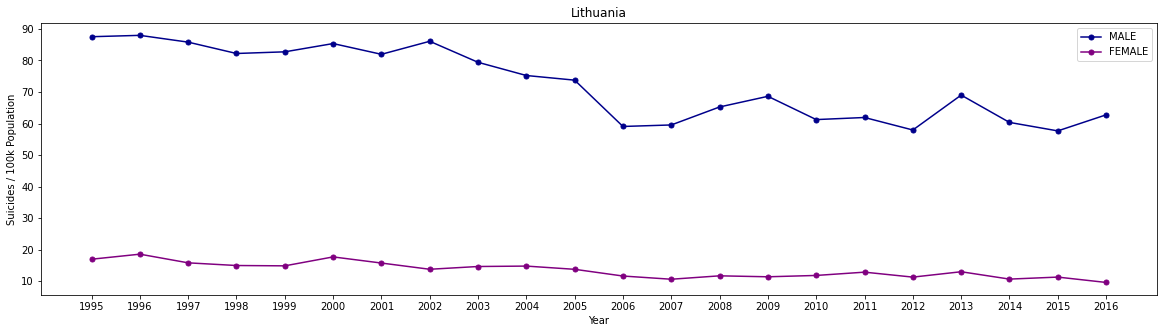

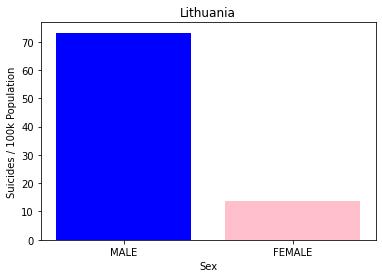

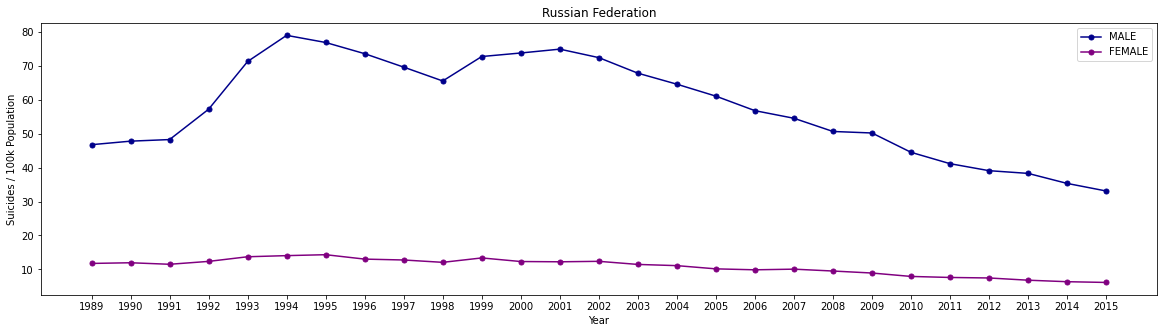

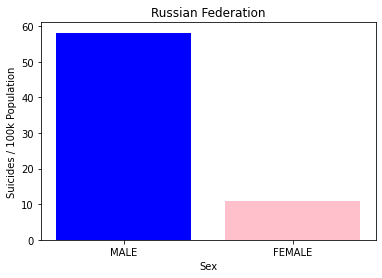

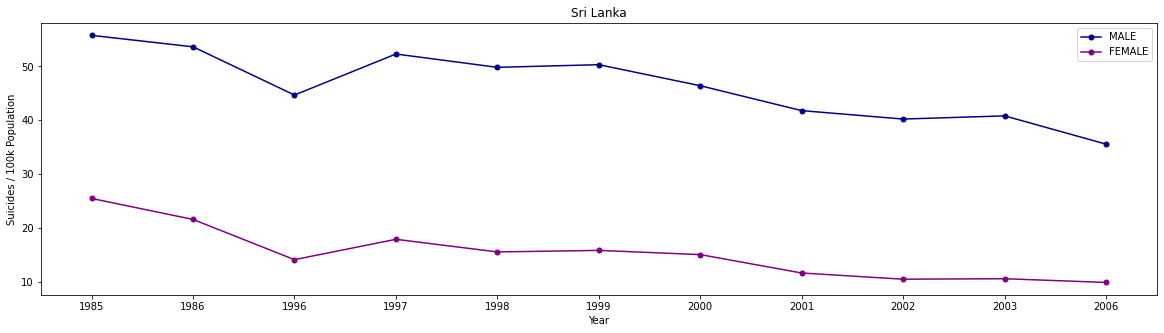

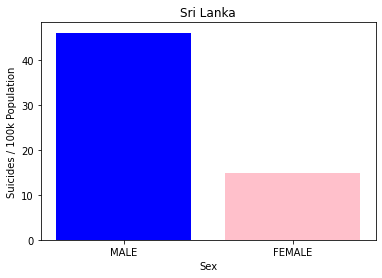

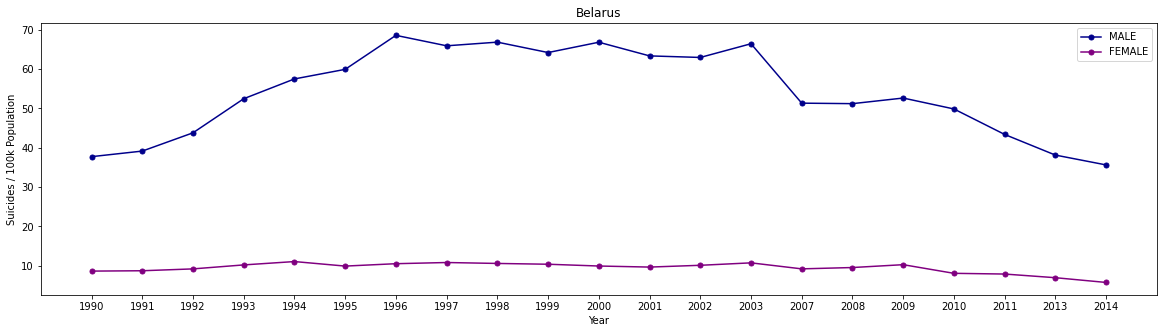

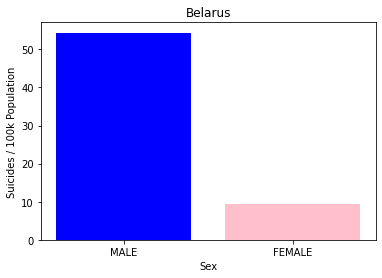

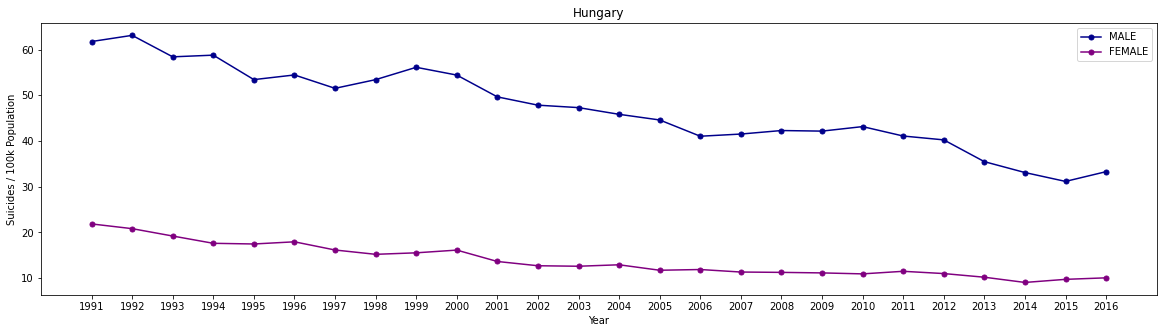

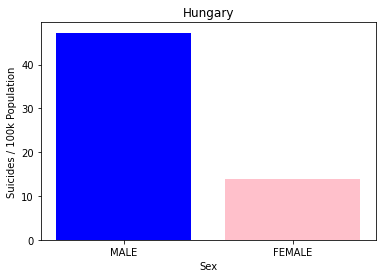

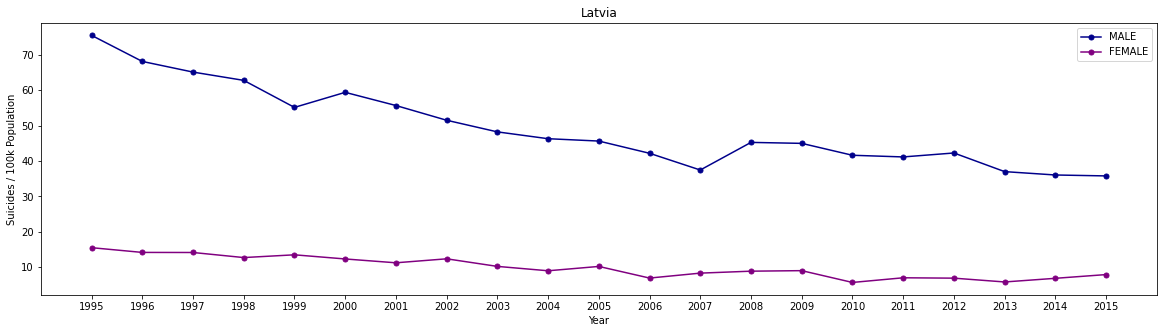

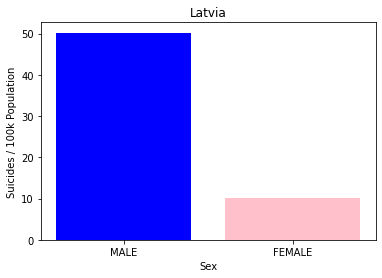

In [66]:
current_m = df_m
current_f = df_f
for element in list(top_6.keys()):
    element_df_m = current_m[current_m['country'] == element]
    year_dict_m = {}
    for year in pd.unique(element_df_m['year']):
        temp_m = element_df_m[element_df_m['year'] == year]
        value_m = (temp_m.sum()['suicides_no']/temp_m.sum()['population'])*100000
        year_dict_m[year] = value_m
    
    element_df_f = current_f[current_f['country'] == element]
    year_dict_f = {}
    for year in pd.unique(element_df_f['year']):
        temp_f = element_df_f[element_df_f['year'] == year]
        value_f = (temp_f.sum()['suicides_no']/temp_f.sum()['population'])*100000
        year_dict_f[year] = value_f
    
    fig , ax = plt.subplots(figsize=(20,5))
    x_m = [str(e) for e in list(year_dict_m.keys())]
    x_f = [str(e) for e in list(year_dict_f.keys())]

    ax.plot(x_m , list(year_dict_m.values()),marker='o',color='darkblue',ms=5)
    ax.plot(x_f , list(year_dict_f.values()),marker='o',color='purple',ms=5)
    plt.title(element)
    plt.xlabel("Year")
    plt.ylabel("Suicides / 100k Population")
    ax.legend(labels =["MALE","FEMALE"],loc = "upper right")
    
    sex_dict = {}
    male_tot = (element_df_m.sum()['suicides_no']/element_df_m.sum()['population'])*100000
    female_tot = (element_df_f.sum()['suicides_no']/element_df_f.sum()['population'])*100000
    plt.show()
    plt.bar( ["MALE","FEMALE"],  [male_tot,female_tot],color = ('blue','pink'))
    plt.ylabel("Suicides / 100k Population")
    plt.title(element)
    plt.xlabel("Sex")
    plt.show()





As we can see, the suicide rate in males is significantly higher than that of females. We can infer that the main cause of suicide is therefore work-related problems as conventionally and statiscally the male workforce is greater in number than the female workforce.

#### d) Worst year for each generation 

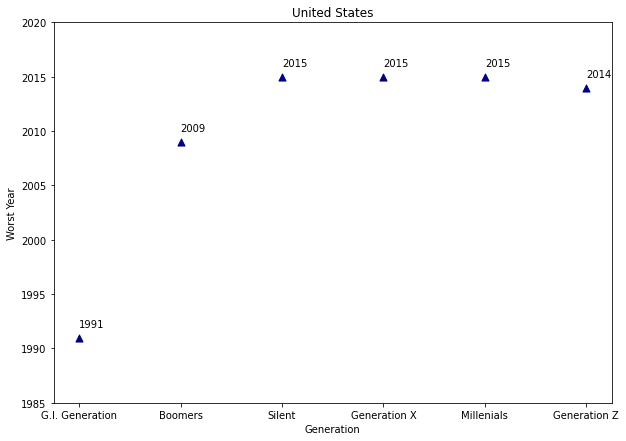

In [67]:
us = df[df['country'] == 'United States']
gen = pd.unique(us['generation'])

gen_dict = {}
for element in gen:
    gen_df = us[us['generation'] == element]
    years = pd.unique(gen_df['year'])
    value_max= 0
    year_max = 0
    for year in years:
        gen_df_year = gen_df[gen_df['year'] == year]
        value = (gen_df_year.sum()['suicides_no']/gen_df_year.sum()['population'])*100000
        if value > value_max:
            value_max = value
            year_max = year
            
    gen_dict[element] = year_max
    
fig = plt.figure(figsize = (10,7))
x_gen = list(gen_dict.keys())
y_gen = list(gen_dict.values())
plt.scatter(x_gen,y_gen,s=50,marker='^',color = 'navy')

for i in range(len(x_gen)):
    plt.annotate(y_gen[i],[x_gen[i],y_gen[i]+1])
plt.ylim((1985,2020))
plt.xlabel("Generation")
plt.ylabel("Worst Year")
plt.title("United States")
plt.show()  

We can see that 2015 was a very bad year as it is the worst year for 3 generations.

#### e) Bihistogram 

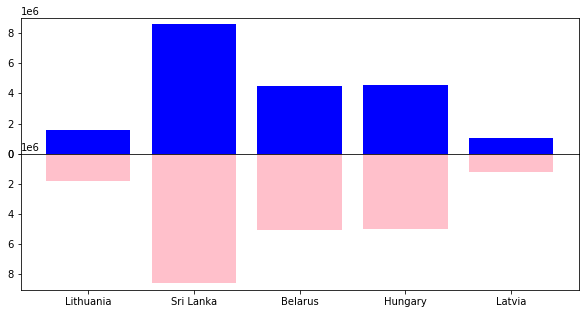

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))
top_6_list = list(pd.unique(top_6_df['country']))
del top_6_list[1]
for ax,gender,color in zip(axes.ravel(),["male","female"],["blue","pink"]):
    lith_gen = lith[lith['sex'] == gender]
    lith_gen = lith_gen[lith_gen['year'] == 2000]
    rus_gen = rus[rus['sex'] == gender]
    rus_gen = rus_gen[rus_gen['year'] == 2000]
    bel_gen = bel[bel['sex'] == gender]
    bel_gen = bel_gen[bel_gen['year'] == 2000]
    hun_gen = hun[hun['sex'] == gender]
    hun_gen = hun_gen[hun_gen['year'] == 2000]
    sri_gen = sri[sri['sex'] == gender]
    sri_gen = sri_gen[sri_gen['year'] == 2000]
    lat_gen = lat[lat['sex'] == gender]
    lat_gen = lat_gen[lat_gen['year'] == 2000]
    
    top_6_gen = [lith_gen.sum()['population'],
                sri_gen.sum()['population'],
                bel_gen.sum()['population'],
                hun_gen.sum()['population'],
                lat_gen.sum()['population']]
    ax.bar(top_6_list,top_6_gen,color = color)
    
    if gender == "female":
        ax.invert_yaxis()
        
plt.subplots_adjust(hspace=0)
plt.show()

As we see there is negligible difference in the male and female population. 

#### f) Bubble Plot

In [68]:
hdi_null = df['HDI for year'].isnull()
hdi = df[hdi_null == False]
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8364 non-null   object 
 1   year                8364 non-null   int64  
 2   sex                 8364 non-null   object 
 3   age                 8364 non-null   object 
 4   suicides_no         8364 non-null   int64  
 5   population          8364 non-null   int64  
 6   suicides/100k pop   8364 non-null   float64
 7   country-year        8364 non-null   object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   8364 non-null   float64
 10  gdp_per_capita ($)  8364 non-null   int64  
 11  generation          8364 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 849.5+ KB


In [69]:
hdi_list = []
countries = pd.unique(hdi['country'])

for element in countries:
    temp = hdi[hdi['country'] == element]
    unique_year = pd.unique(temp['year'])
    for year in unique_year:
        temp2 = temp[temp['year'] == year]
        suic_rate = (temp2.sum()['suicides_no']/temp2.sum()['population'])*100000
        value = [element,int(year),float(suic_rate),float(temp2.sum()['population']),float(temp2['HDI for year'].iloc[0])]
        hdi_list.append(value)
len(hdi_list)

697

In [70]:
hdi_list = np.array(hdi_list)

In [71]:
hdi_plot = pd.DataFrame(hdi_list,columns = ["Country","Year","Suicides / 100k population","Population","HDI"])
hdi_plot["Year"] = hdi_plot["Year"].astype(int)
hdi_plot["Suicides / 100k population"] = hdi_plot["Suicides / 100k population"].astype(float)
hdi_plot["Population"] = hdi_plot["Population"].astype(float)
hdi_plot["HDI"] = hdi_plot["HDI"].astype(float)

In [72]:
hdi_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     697 non-null    object 
 1   Year                        697 non-null    int64  
 2   Suicides / 100k population  697 non-null    float64
 3   Population                  697 non-null    float64
 4   HDI                         697 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.4+ KB


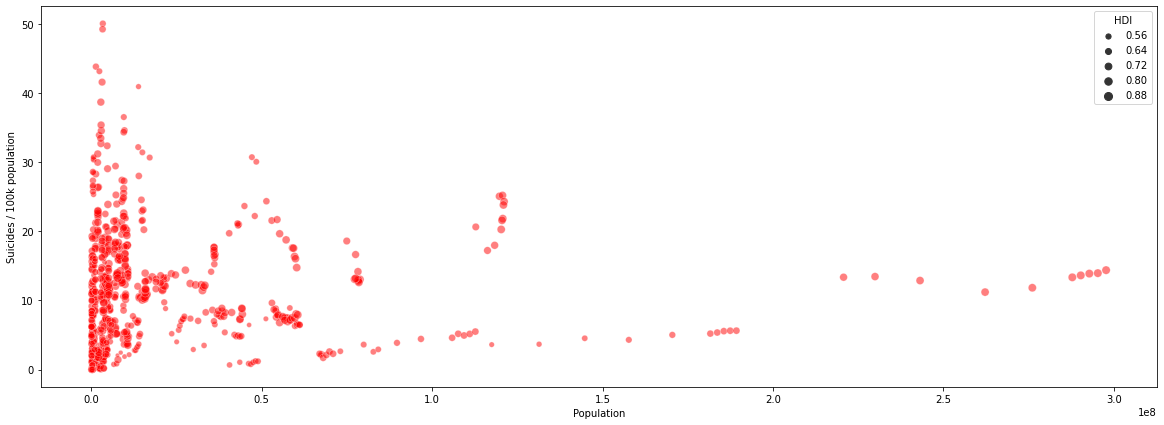

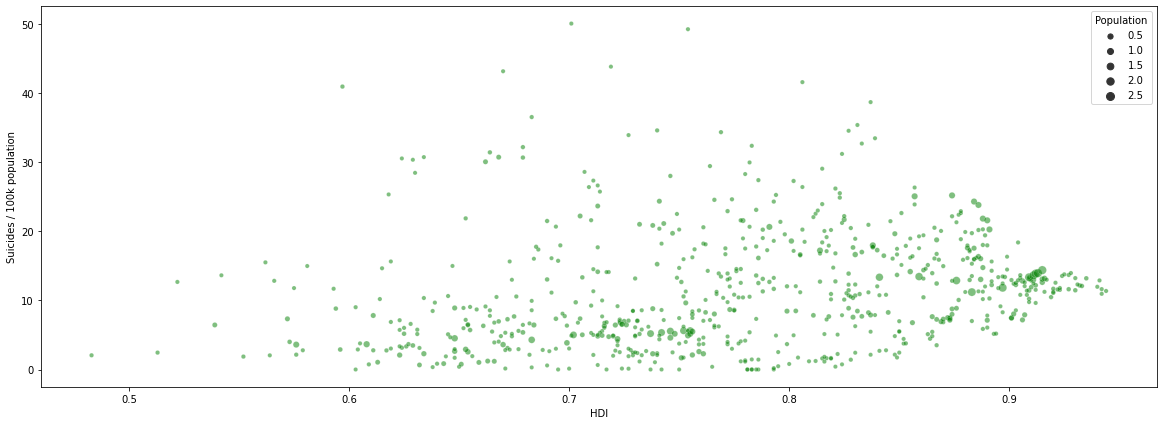

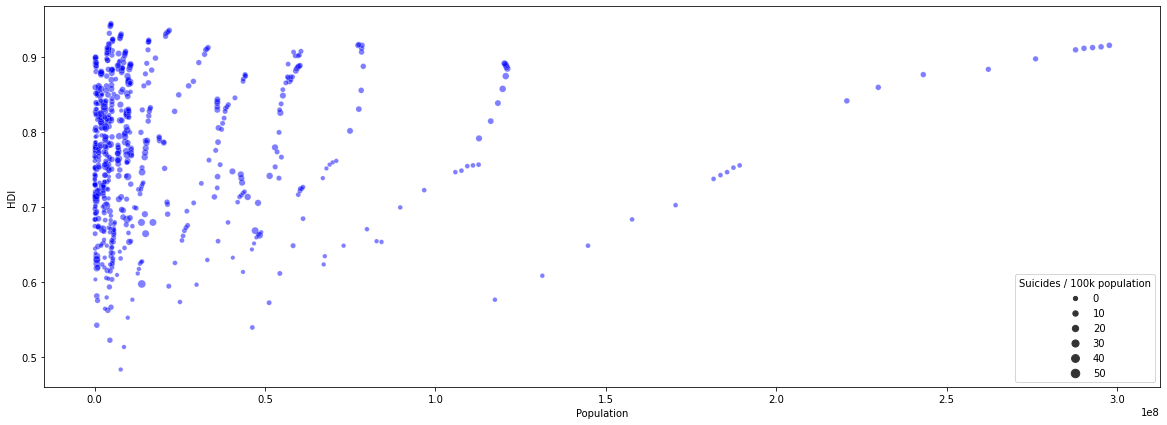

In [73]:
fig = plt.figure(figsize = (20,7))
sns.scatterplot(data=hdi_plot,x = "Population" , y = "Suicides / 100k population", size= "HDI",color = "red",alpha = 0.5)
plt.show()
fig = plt.figure(figsize = (20,7))
sns.scatterplot(data=hdi_plot,size = "Population" , y = "Suicides / 100k population", x= "HDI",color = "green",alpha = 0.5)
plt.show()
fig = plt.figure(figsize = (20,7))
sns.scatterplot(data=hdi_plot,x = "Population" , size = "Suicides / 100k population", y= "HDI",color = "blue",alpha = 0.5)
plt.show()


From the above graphs, we infer that: 
1) For most countries, the suicide rate is less than 20. \
\
2) The Number of suicides / 100k population seems to be uncorrelated to the HDI for year, even with population acting as another filter. This is counterintuitive as we would expect the suicide rates to go down with as increase in the HDI for year as the HDI measures the human development for that year. \
\
3) The HDI for year for most countries is above 0.7 